In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns; sns.set()
import pandas as pd

In [78]:
print(-np.log2(data_pvalue))
print(data_pvalue)

                         RHvsLH   RHvsRest   LHvsRest
StdERDCalibrationRH    2.321928   1.251539   2.556393
StdERDUserTrainingRH   0.473931   1.184425   4.107803
StdERDCalibrationLH    2.120294   3.836501   2.251539
StdERDUserTrainingLH   0.473931   4.921390   5.965784
MeanERDCalibrationRH   6.795859   6.795859   3.522841
MeanERDUserTrainingRH  5.058894   8.965784  10.117787
MeanERDCalibrationLH   7.828281  11.287712   6.795859
MeanERDUserTrainingLH  4.836501   9.287712   9.965784
                       RHvsLH  RHvsRest  LHvsRest
StdERDCalibrationRH    0.2000    0.4200    0.1700
StdERDUserTrainingRH   0.7200    0.4400    0.0580
StdERDCalibrationLH    0.2300    0.0700    0.2100
StdERDUserTrainingLH   0.7200    0.0330    0.0160
MeanERDCalibrationRH   0.0090    0.0090    0.0870
MeanERDUserTrainingRH  0.0300    0.0020    0.0009
MeanERDCalibrationLH   0.0044    0.0004    0.0090
MeanERDUserTrainingLH  0.0350    0.0016    0.0010


In [55]:
data_rho = pd.read_csv("C:\\Users\Dtrocell\Documents\ML_exploratory\classeur5.csv", sep=";", index_col=0)
data_pvalue = pd.read_csv("C:\\Users\Dtrocell\Documents\ML_exploratory\classeur_pvalue.csv", sep=";", index_col=0)

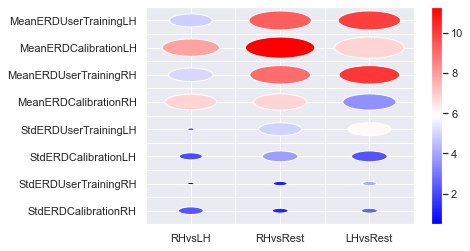

In [64]:
N = 8
M = 3
ylabels = data_rho.index
xlabels = data_rho.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))

fig, ax = plt.subplots()


circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(data_rho.to_numpy().flatten(), x.flat, y.flat)]
col = PatchCollection(circles, array=-np.log2(data_pvalue).to_numpy().flatten(), cmap=plt.get_cmap("bwr"))
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()

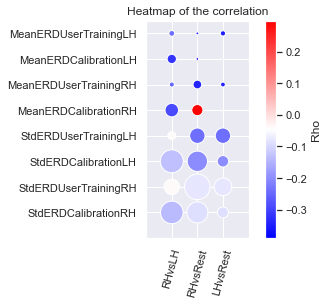

In [198]:
N = 8
M = 3
ylabels = data_rho.index
xlabels = data_rho.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))

fig, ax = plt.subplots()
ax.set_title('Heatmap of the correlation')
pvalue = -np.log2(data_pvalue).to_numpy().flatten()
R = np.flip(((pvalue/pvalue.max())))


circles = [plt.Circle((j*2,i*2), radius=r) for r, j, i in zip(R, x.flat, y.flat)]
col = PatchCollection(circles, array=data_rho.to_numpy().flatten(), cmap=plt.get_cmap("bwr"))
ax.add_collection(col)

ax.set(xticks=np.arange(M)*2, yticks=np.arange(N)*2,
       xticklabels=xlabels, yticklabels=ylabels)
plt.xticks(rotation=75)
plt.axis([-2,6,-2,15])
ax.set_aspect('equal')
# ax.set_xticks(2*(np.arange(M+1)-0.5), minor= True)
# ax.set_yticks(2*(np.arange(N+1)-0.5), minor=True)

fig.colorbar(col, label= "Rho")
fig.savefig('comparison.png', dpi=200, bbox_inches = 'tight')
plt.show()

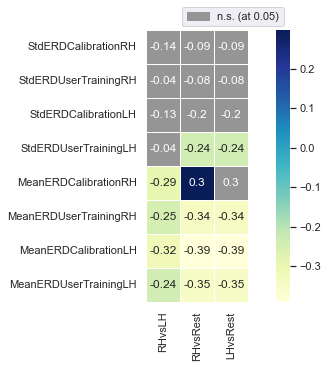

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches



# get the p value for pearson coefficient, subtract 1 on the diagonal
pvals = data_pvalue
# set the significance threshold
psig = 0.05

plt.figure(figsize=(10,5))

sns.heatmap(data_rho[pvals<psig], annot=True, square=True, cmap= "YlGnBu", linewidths=1)

# add another heatmap with colouring the non-significant cells
sns.heatmap(data_rho[pvals>=psig], annot=True, square=True, cbar=False, linewidths=1,
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))



# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')
plt.savefig('heatmap_grey.png',dpi=200,  bbox_inches = 'tight')

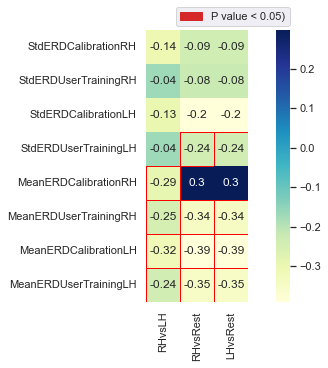

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches



# get the p value for pearson coefficient, subtract 1 on the diagonal
pvals = data_pvalue
# set the significance threshold
psig = 0.05

plt.figure(figsize=(10,5))


# add another heatmap with colouring the non-significant cells
sns.heatmap(data_rho[pvals<psig], annot=True, square=True, cmap= "YlGnBu",linewidths=1, linecolor='red')
sns.heatmap(data_rho[pvals>=psig], annot=True, square=True, cmap= "YlGnBu",cbar=False)



# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette(sns.color_palette("tab10"), n_colors=10, desat=1)[3]]
texts = [f"P value < {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')
plt.savefig('heatmap_red.png',dpi=200, bbox_inches = 'tight')

In [119]:
print(pvalue/pvalue.max()/2)
np.arange(M)

[0.10285202 0.0554381  0.11323788 0.02099323 0.05246522 0.18195907
 0.09392046 0.16994149 0.09973406 0.02099323 0.21799768 0.26426011
 0.30102908 0.30102908 0.1560476  0.22408853 0.39714798 0.44817705
 0.34676117 0.5        0.30102908 0.21423744 0.41140809 0.44144393]


array([0, 1, 2])

In [102]:
R.invert()

AttributeError: 'numpy.ndarray' object has no attribute 'invert'

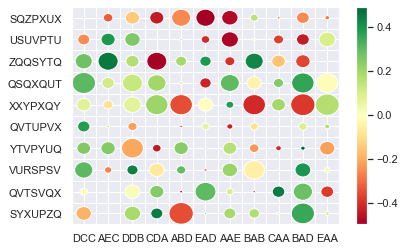

In [38]:
N = 10
M = 11
ylabels = ["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = ["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.random.randint(0, 180, size=(N,M))
c = np.random.rand(N, M)-0.5

fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="RdYlGn")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()

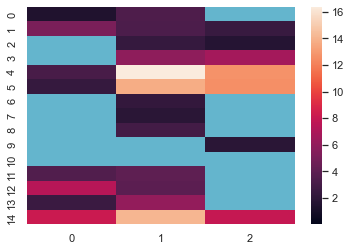

In [4]:

data = np.array([[1.3531363408, 3.339479161, 0.0760855365], [5.1167382617, 3.2890920405, 2.4764601828], [0.0025058257, 2.3165128345, 1.6532714962], [0.2600549869, 5.8427407219, 6.6627226609], [3.0828581725, 16.3825494439, 12.6722666929], [2.3386307357, 13.7275065772, 12.5760972276], [1.224683813, 2.2213656372, 0.6300876451], [0.4163788387, 1.8128374089, 0.0013106046], [0.0277592882, 2.9286203949, 0.810978992], [0.0086613622, 0.6181261247, 1.8287878837], [1.0174519889, 0.2621290291, 0.1922637697], [3.4687429571, 4.0061981716, 0.5507951444], [7.4201304939, 3.881457516, 0.1294141768], [2.5227546319, 6.0526491816, 0.3814362442], [8.147538027, 14.0975727815, 7.9755706939]])
cmap1 = mpl.colors.ListedColormap(['c'])
sns.heatmap(data)
sns.heatmap(data, mask=data > 1.3, cmap=cmap1, cbar=False)
plt.show()

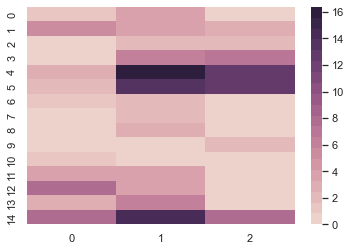

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns; sns.set()
data = [[1.3531363408, 3.339479161, 0.0760855365], [5.1167382617, 3.2890920405, 2.4764601828], [0.0025058257, 2.3165128345, 1.6532714962], [0.2600549869, 5.8427407219, 6.6627226609], [3.0828581725, 16.3825494439, 12.6722666929], [2.3386307357, 13.7275065772, 12.5760972276], [1.224683813, 2.2213656372, 0.6300876451], [0.4163788387, 1.8128374089, 0.0013106046], [0.0277592882, 2.9286203949, 0.810978992], [0.0086613622, 0.6181261247, 1.8287878837], [1.0174519889, 0.2621290291, 0.1922637697], [3.4687429571, 4.0061981716, 0.5507951444], [7.4201304939, 3.881457516, 0.1294141768], [2.5227546319, 6.0526491816, 0.3814362442], [8.147538027, 14.0975727815, 7.9755706939]]
cmap2 = mpl.colors.ListedColormap(sns.cubehelix_palette(n_colors=20, start=0, rot=0.4, gamma=1, hue=0.8, light=0.85, dark=0.15, reverse=False))
ax = sns.heatmap(data, cmap=cmap2, vmin=0)
plt.show()

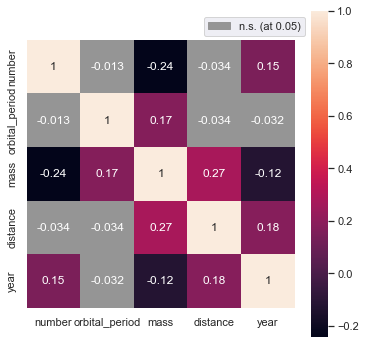

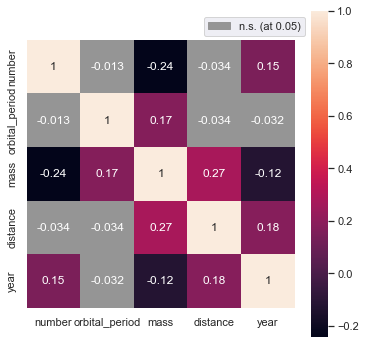

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

planets = sns.load_dataset('planets')

# get the p value for pearson coefficient, subtract 1 on the diagonal
pvals = planets.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*planets.corr().shape)
# set the significance threshold
psig = 0.05

plt.figure(figsize=(6,6))

sns.heatmap(planets.corr()[pvals<psig], annot=True, square=True)

# add another heatmap with colouring the non-significant cells
sns.heatmap(planets.corr()[pvals>=psig], annot=True, square=True, cbar=False,
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))



# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

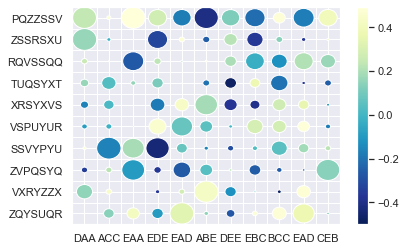

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 10
M = 11
ylabels = ["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = ["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.random.randint(0, 180, size=(N,M))
c = np.random.rand(N, M)-0.5

fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap=plt.get_cmap("YlGnBu").reversed())
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()